In [82]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [83]:
# Definisikan variabel input dan output
kecepatan = ctrl.Antecedent(np.arange(0, 11, 1), 'kecepatan')
keramahan = ctrl.Antecedent(np.arange(0, 11, 1), 'keramahan')
kualitas = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas')
kenyamanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kenyamanan')

In [84]:
# Definisikan fungsi keanggotaan untuk kecepatan, keramahn, kualitas, dan kenyamanan
kecepatan['lambat'] = fuzz.trimf(kecepatan.universe, [0, 0, 5])
kecepatan['sedang'] = fuzz.trimf(kecepatan.universe, [0, 5, 10])
kecepatan['cepat'] = fuzz.trimf(kecepatan.universe, [5, 10, 10])

# Definisikan fungsi keanggotaan untuk keramahan
keramahan['tidak ramah'] = fuzz.trimf(keramahan.universe, [0, 0, 5])
keramahan['cukup ramah'] = fuzz.trimf(keramahan.universe, [0, 5, 10])
keramahan['sangat ramah'] = fuzz.trimf(keramahan.universe, [5, 10, 10])

# Definisikan fungsi keanggotaan untuk kualitas
kualitas['buruk'] = fuzz.trimf(kualitas.universe, [0, 0, 5])
kualitas['cukup'] = fuzz.trimf(kualitas.universe, [0, 5, 10])
kualitas['baik'] = fuzz.trimf(kualitas.universe, [5, 10, 10])

# Definisikan fungsi keanggotaan untuk kenyamanan
kenyamanan['tidak nyaman'] = fuzz.trimf(kenyamanan.universe, [0, 0, 5])
kenyamanan['cukup nyaman'] = fuzz.trimf(kenyamanan.universe, [0, 5, 10])
kenyamanan['sangat nyaman'] = fuzz.trimf(kenyamanan.universe, [5, 10, 10])



In [85]:
# Definisikan output kebahagiaan
kebahagiaan = ctrl.Consequent(np.arange(0, 11, 1), 'kebahagiaan')
kebahagiaan['tidak bahagia'] = fuzz.trimf(kebahagiaan.universe, [0, 0, 5])
kebahagiaan['cukup bahagia'] = fuzz.trimf(kebahagiaan.universe, [0, 5, 10])
kebahagiaan['sangat bahagia'] = fuzz.trimf(kebahagiaan.universe, [5, 10, 10])

In [86]:
# Definisikan aturan fuzzy
rules = [
    ctrl.Rule(kecepatan['lambat'] | keramahan['tidak ramah'] | kualitas['buruk'] | kenyamanan['tidak nyaman'], kebahagiaan['tidak bahagia']),
    ctrl.Rule(kecepatan['sedang'] & keramahan['cukup ramah'] & kualitas['cukup'] & kenyamanan['cukup nyaman'], kebahagiaan['cukup bahagia']),
    ctrl.Rule(kecepatan['cepat'] & keramahan['sangat ramah'] & kualitas['baik'] & kenyamanan['sangat nyaman'], kebahagiaan['sangat bahagia']),
]

In [87]:
# Buat sistem kontrol fuzzy
kebahagiaan_ctrl = ctrl.ControlSystem(rules)
kebahagiaan_sim = ctrl.ControlSystemSimulation(kebahagiaan_ctrl)

# Berikan nilai pada semua input
kebahagiaan_sim.input['kecepatan'] = 8  
kebahagiaan_sim.input['keramahan'] = 7  
kebahagiaan_sim.input['kualitas'] = 7   
kebahagiaan_sim.input['kenyamanan'] = 9  

# run 
kebahagiaan_sim.compute()


Tingkat Kebahagiaan Pelanggan: 6.05


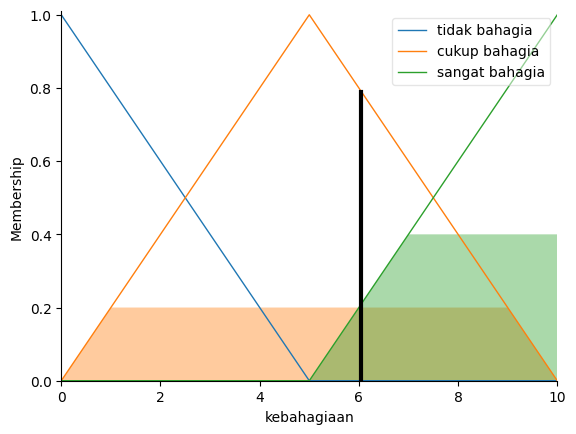

In [88]:

# Cetak hasil
print(f"Tingkat Kebahagiaan Pelanggan: {kebahagiaan_sim.output['kebahagiaan']:.2f}")
kebahagiaan.view(sim=kebahagiaan_sim)